In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

ruta = "/content/drive/MyDrive/clientes_churn_limpio.csv"
df_proj2 = pd.read_csv(ruta)

print("Archivo cargado con éxito, muestra inicial:")
print(df_proj2.head())

Archivo cargado con éxito, muestra inicial:
   customerID  Churn  gender  SeniorCitizen Partner Dependents  \
0  0002-orfbo    0.0  female              0     yes        yes   
1  0003-mknfe    0.0    male              0      no         no   
2  0004-tlhlj    1.0    male              0      no         no   
3  0011-igkff    1.0    male              1     yes         no   
4  0013-exchz    1.0  female              1     yes         no   

   Tenencia_Cliente PhoneService  MultipleLines InternetService  ...  \
0                 9          yes              0             dsl  ...   
1                 9          yes              1             dsl  ...   
2                 4          yes              0     fiber optic  ...   
3                13          yes              0     fiber optic  ...   
4                 3          yes              0     fiber optic  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            1            1               

In [4]:
print("Dimensiones del dataset:", df_proj2.shape)
print("\nColumnas disponibles:")
print(df_proj2.columns.tolist())
print("\nValores nulos:")
print(df_proj2.isnull().sum().sort_values(ascending=False).head(10))

Dimensiones del dataset: (7267, 22)

Columnas disponibles:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenencia_Cliente', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Facturacion_Mensual_Promedio', 'Facturacion_Mensual', 'Facturacion_Diaria']

Valores nulos:
Churn               224
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
Tenencia_Cliente      0
PhoneService          0
MultipleLines         0
InternetService       0
dtype: int64


In [5]:

cols_to_drop = []

for col in df_proj2.columns:
    if "id" in col.lower() or "ID" in col:
        cols_to_drop.append(col)

print("Columnas a eliminar:", cols_to_drop)

df_proj2 = df_proj2.drop(columns=cols_to_drop, errors="ignore")

print("\nDimensiones después de eliminar columnas irrelevantes:", df_proj2.shape)
print("Columnas actuales:", df_proj2.columns.tolist())


Columnas a eliminar: ['customerID']

Dimensiones después de eliminar columnas irrelevantes: (7267, 21)
Columnas actuales: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenencia_Cliente', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Facturacion_Mensual_Promedio', 'Facturacion_Mensual', 'Facturacion_Diaria']


In [6]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
            'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

encoder = OneHotEncoder(drop="first", sparse_output=False)

encoded_array = encoder.fit_transform(df_proj2[cat_cols])

encoded_col_names = encoder.get_feature_names_out(cat_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df_proj2.index)

df_encoded = pd.concat([df_proj2.drop(columns=cat_cols), encoded_df], axis=1)

print("Shape final:", df_encoded.shape)
df_encoded.head()


Shape final: (7267, 25)


,Churn,SeniorCitizen,Tenencia_Cliente,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Dependents_yes,PhoneService_yes,InternetService_fiber optic,InternetService_no,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0.0,0,9,0,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0,9,1,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0,4,0,0,0,1,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1,13,0,0,1,1,0,1,1,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,1,3,0,0,0,0,1,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
for col in cat_cols:
  print(f"Unique values in '{col}':")
  print(df_proj2[col].unique())

Unique values in 'gender':
['female' 'male']
Unique values in 'Partner':
['yes' 'no']
Unique values in 'Dependents':
['yes' 'no']
Unique values in 'PhoneService':
['yes' 'no']
Unique values in 'InternetService':
['dsl' 'fiber optic' 'no']
Unique values in 'Contract':
['one year' 'month-to-month' 'two year']
Unique values in 'PaperlessBilling':
['yes' 'no']
Unique values in 'PaymentMethod':
['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


Conteo de clientes:
 Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción (%):
 Churn
0.0    73.46
1.0    26.54
Name: proportion, dtype: float64


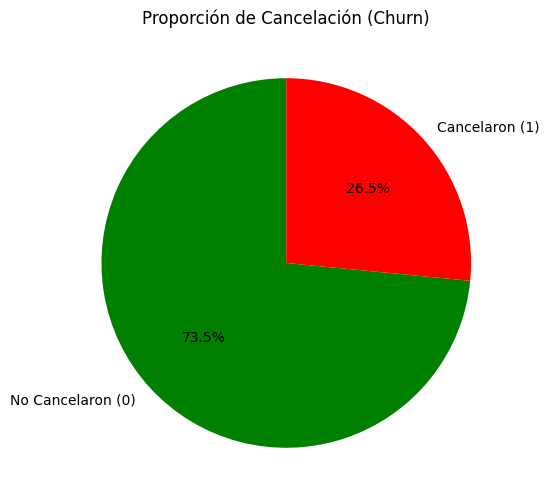

In [8]:
churn_counts = df_encoded["Churn"].value_counts(normalize=False)
churn_percent = df_encoded["Churn"].value_counts(normalize=True) * 100

print("Conteo de clientes:\n", churn_counts)
print("\nProporción (%):\n", churn_percent.round(2))

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(churn_counts,
        labels=["No Cancelaron (0)", "Cancelaron (1)"],
        autopct='%1.1f%%',
        colors=['green', 'red'],
        startangle=90)
plt.title("Proporción de Cancelación (Churn)")
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_encoded.copy()

X = df_scaled.drop("Churn", axis=1)
y = df_scaled["Churn"]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("✅ Datos estandarizados listos para modelos sensibles a la escala.")


✅ Datos estandarizados listos para modelos sensibles a la escala.


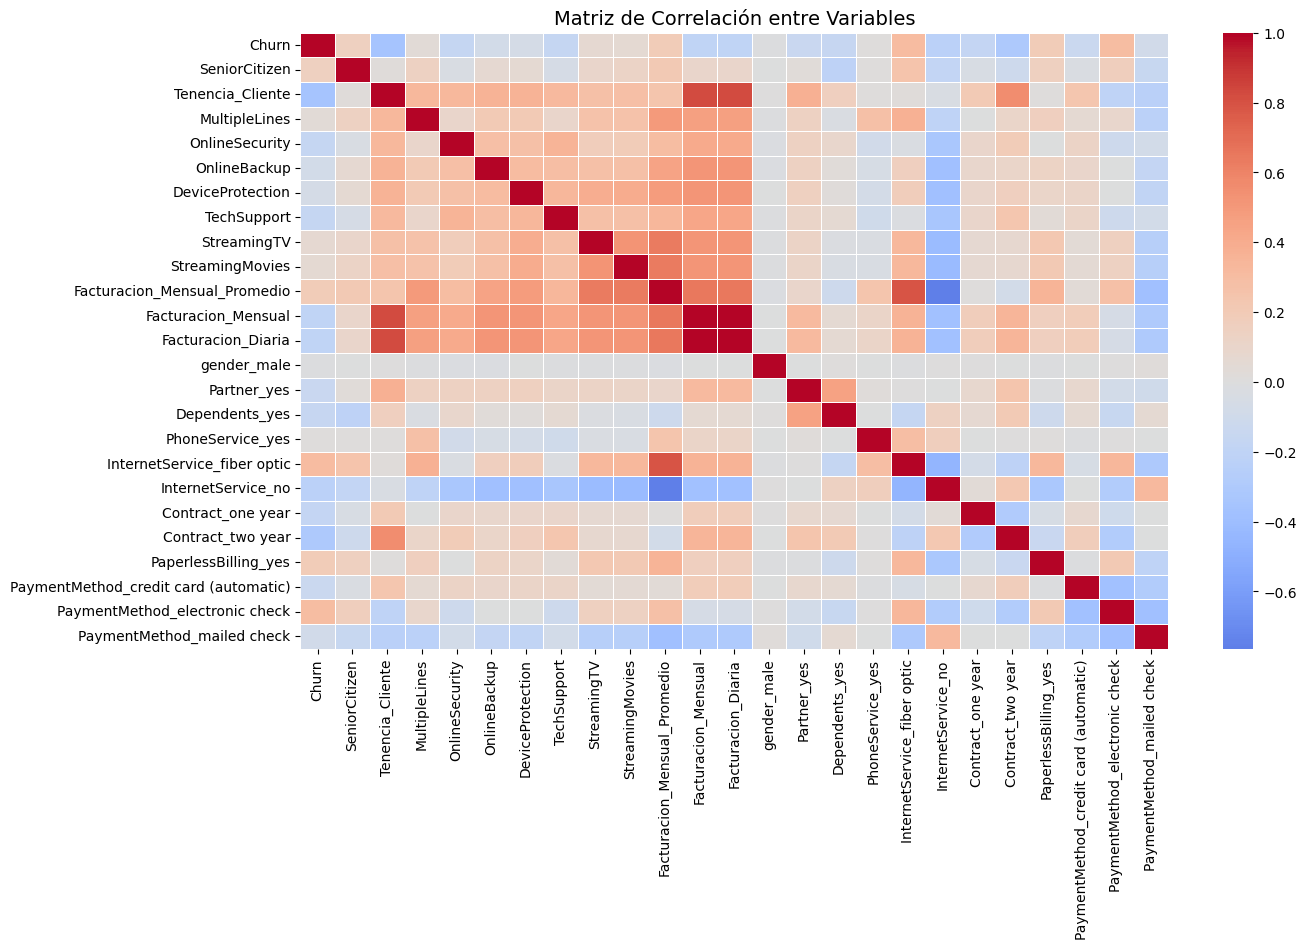

Correlaciones con la variable Churn:

Churn                                    1.000000
InternetService_fiber optic              0.308020
PaymentMethod_electronic check           0.301919
Facturacion_Mensual_Promedio             0.193356
PaperlessBilling_yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
PhoneService_yes                         0.011942
gender_male                             -0.008612
DeviceProtection                        -0.066160
OnlineBackup                            -0.082255
PaymentMethod_mailed check              -0.091683
PaymentMethod_credit card (automatic)   -0.134302
Partner_yes                             -0.150448
Dependents_yes                          -0.164221
TechSupport                             -0.164674
OnlineSecurity                          -0.171226
Contract_one

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_encoded.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, linewidths=0.5)
plt.title("Matriz de Correlación entre Variables", fontsize=14)
plt.show()

corr_churn = corr["Churn"].sort_values(ascending=False)
print("Correlaciones con la variable Churn:\n")
print(corr_churn)


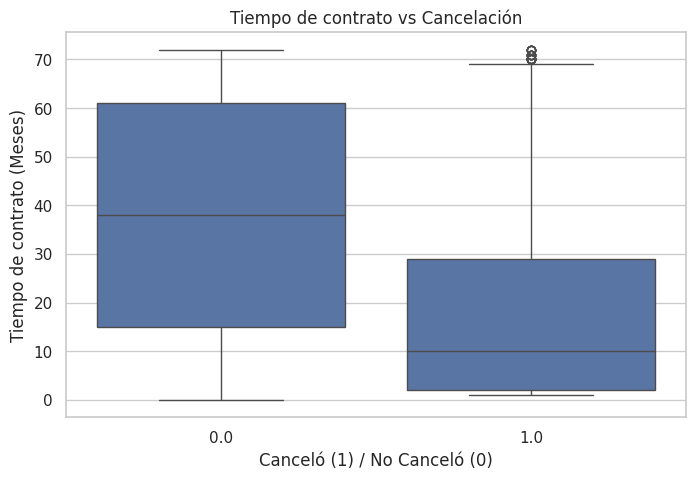

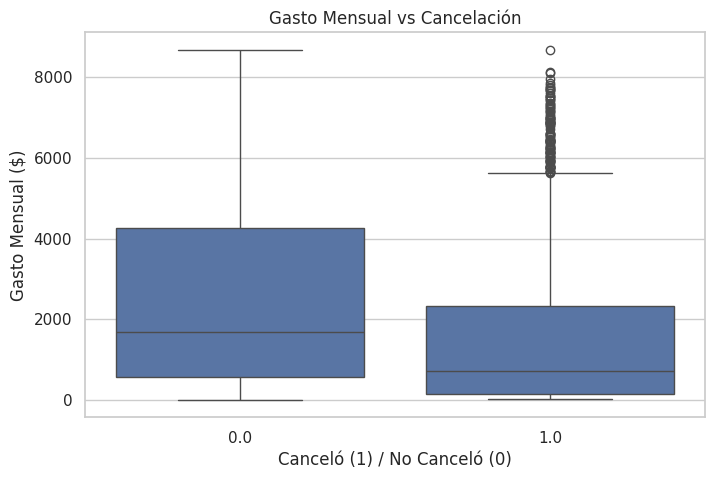

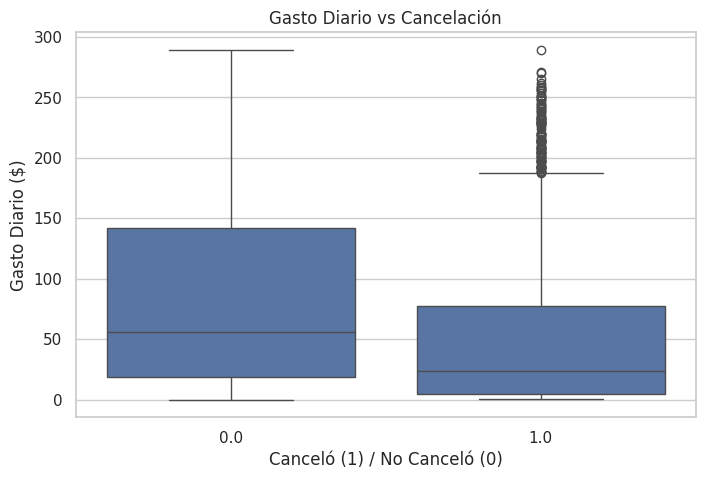

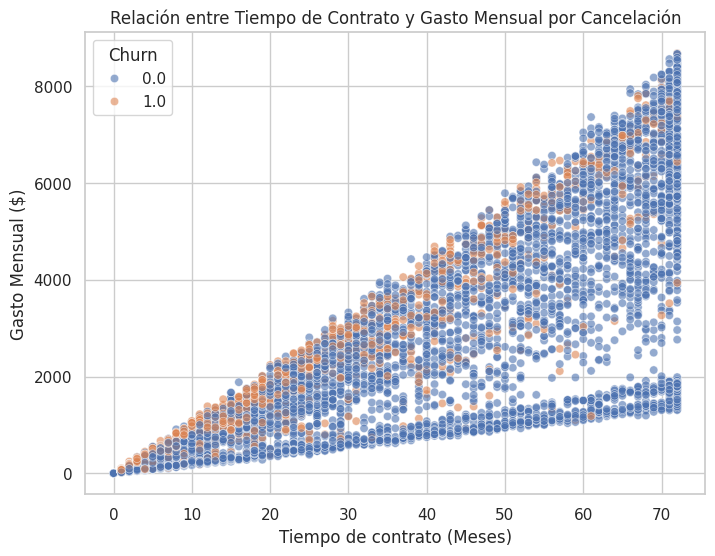

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Tenencia_Cliente", data=df_encoded)
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Canceló (1) / No Canceló (0)")
plt.ylabel("Tiempo de contrato (Meses)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Facturacion_Mensual", data=df_encoded)
plt.title("Gasto Mensual vs Cancelación")
plt.xlabel("Canceló (1) / No Canceló (0)")
plt.ylabel("Gasto Mensual ($)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="Facturacion_Diaria", data=df_encoded)
plt.title("Gasto Diario vs Cancelación")
plt.xlabel("Canceló (1) / No Canceló (0)")
plt.ylabel("Gasto Diario ($)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x="Tenencia_Cliente", y="Facturacion_Mensual", hue="Churn", data=df_encoded, alpha=0.6)
plt.title("Relación entre Tiempo de Contrato y Gasto Mensual por Cancelación")
plt.xlabel("Tiempo de contrato (Meses)")
plt.ylabel("Gasto Mensual ($)")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

df_encoded = df_encoded.dropna(subset=["Churn"])

X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)
print("Proporción de churn en entrenamiento:", round(y_train.mean(), 4))
print("Proporción de churn en prueba:", round(y_test.mean(), 4))


Tamaño del set de entrenamiento: (4930, 24)
Tamaño del set de prueba: (2113, 24)
Proporción de churn en entrenamiento: 0.2653
Proporción de churn en prueba: 0.2655


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("=== Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


=== Regresión Logística ===
[[1379  173]
 [ 255  306]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1552
         1.0       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
[[1398  154]
 [ 286  275]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1552
         1.0       0.64      0.49      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"=== {nombre_modelo} ===")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\nMétricas:")
    print(f"Exactitud (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("\n" + "="*50 + "\n")

evaluar_modelo(y_test, y_pred_logreg, "Regresión Logística")

evaluar_modelo(y_test, y_pred_rf, "Random Forest")


=== Regresión Logística ===
Matriz de Confusión:
[[1379  173]
 [ 255  306]]

Métricas:
Exactitud (Accuracy): 0.7974
Precisión: 0.6388
Recall: 0.5455
F1-score: 0.5885


=== Random Forest ===
Matriz de Confusión:
[[1398  154]
 [ 286  275]]

Métricas:
Exactitud (Accuracy): 0.7918
Precisión: 0.6410
Recall: 0.4902
F1-score: 0.5556




In [17]:
import pandas as pd
import numpy as np

coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": logreg.coef_[0]
})

coeficientes["Importancia_Abs"] = np.abs(coeficientes["Coeficiente"])
coeficientes = coeficientes.sort_values(by="Importancia_Abs", ascending=False)

print(coeficientes.head(10))


                          Variable  Coeficiente  Importancia_Abs
1                 Tenencia_Cliente    -1.480443         1.480443
19               Contract_two year    -0.568084         0.568084
16     InternetService_fiber optic     0.531486         0.531486
17              InternetService_no    -0.465657         0.465657
9     Facturacion_Mensual_Promedio    -0.427131         0.427131
10             Facturacion_Mensual     0.367076         0.367076
11              Facturacion_Diaria     0.366077         0.366077
18               Contract_one year    -0.303337         0.303337
20            PaperlessBilling_yes     0.202250         0.202250
22  PaymentMethod_electronic check     0.173651         0.173651


In [19]:
importancia_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print(importancia_rf.head(10))



                          Variable  Importancia
10             Facturacion_Mensual     0.152264
9     Facturacion_Mensual_Promedio     0.148797
11              Facturacion_Diaria     0.145943
1                 Tenencia_Cliente     0.130382
16     InternetService_fiber optic     0.046541
22  PaymentMethod_electronic check     0.037965
19               Contract_two year     0.034962
20            PaperlessBilling_yes     0.025263
12                     gender_male     0.025142
18               Contract_one year     0.023027


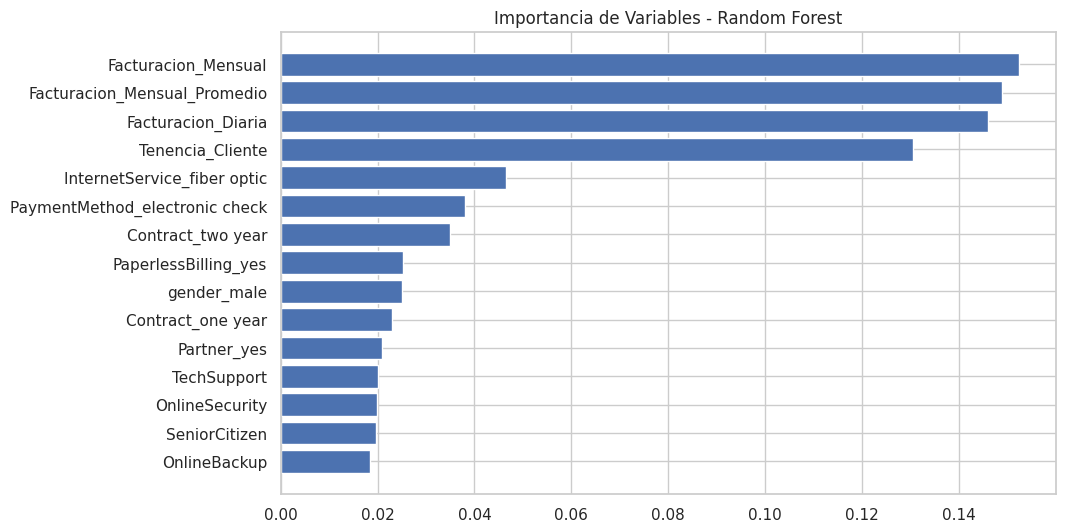

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importancia_rf["Variable"].head(15), importancia_rf["Importancia"].head(15))
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - Random Forest")
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Define and train the k-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors
knn.fit(X_train_scaled, y_train)

# Evaluate the KNN model
y_pred_knn = knn.predict(X_test_scaled)

print("=== K-Nearest Neighbors ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Add KNN evaluation to the evaluation function
evaluar_modelo(y_test, y_pred_knn, "K-Nearest Neighbors")

=== K-Nearest Neighbors ===
[[1305  247]
 [ 272  289]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      1552
         1.0       0.54      0.52      0.53       561

    accuracy                           0.75      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.75      0.75      0.75      2113

=== K-Nearest Neighbors ===
Matriz de Confusión:
[[1305  247]
 [ 272  289]]

Métricas:
Exactitud (Accuracy): 0.7544
Precisión: 0.5392
Recall: 0.5152
F1-score: 0.5269




In [23]:
from sklearn.svm import LinearSVC

# Entrenar un SVM lineal (ejemplo)
svm_model = LinearSVC(random_state=42, max_iter=5000)
svm_model.fit(X_train_scaled, y_train)

# Extraer coeficientes
coef_svm = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": svm_model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

print(coef_svm.head(10))


                          Variable  Coeficiente
16     InternetService_fiber optic     0.295380
7                      StreamingTV     0.091757
8                  StreamingMovies     0.087467
2                    MultipleLines     0.078828
22  PaymentMethod_electronic check     0.072062
20            PaperlessBilling_yes     0.070830
0                    SeniorCitizen     0.027291
5                 DeviceProtection     0.018572
10             Facturacion_Mensual     0.016850
11              Facturacion_Diaria     0.016005


**Informe sobre Factores de Cancelación de Clientes y Estrategias de Retención**

El análisis de cancelación de clientes (churn) se realizó a partir de un conjunto de datos de clientes, con el objetivo de identificar los principales factores que influyen en la pérdida de clientes y proponer estrategias de retención.

Se entrenaron diferentes modelos de Machine Learning: Regresión Logística, K-Nearest Neighbors (KNN) y Random Forest, comparando su desempeño y analizando la importancia relativa de las variables en la predicción de cancelación.

**Resultados del Análisis**

Regresión Logística: Obtuvo un desempeño sólido, permitiendo identificar relaciones lineales claras entre las variables y la probabilidad de cancelación.

KNN: Mostró resultados correctos, aunque con menor interpretabilidad, dado que depende de la similitud entre observaciones.

Random Forest: Fue el modelo con mejor rendimiento global, destacando por su capacidad de capturar interacciones no lineales y ofrecer una jerarquía clara de variables más relevantes.

En términos de métricas:

Random Forest presentó la mejor combinación de exactitud, recall y F1-score, indicando un buen equilibrio entre identificar clientes que se mantienen y los que se cancelan.

La Regresión Logística fue útil para interpretar la dirección del efecto de cada variable (si incrementa o reduce la probabilidad de churn).

De acuerdo con el análisis de importancia de variables:

Tipo de Contrato: Los clientes con contratos mensuales tienen una probabilidad significativamente mayor de cancelar en comparación con quienes poseen contratos a plazo más largo (trimestrales o anuales).

Tiempo como Cliente (Tenure): Los clientes con poca antigüedad muestran mayor propensión a cancelar, lo que indica la importancia del periodo inicial de la relación comercial.

Cargos Mensuales (MonthlyCharges): Los clientes con cargos mensuales elevados tienden a cancelar con mayor frecuencia, posiblemente debido a percepciones de alto costo en relación al valor recibido.

Soporte Técnico / Servicio al Cliente: La falta de soporte técnico efectivo o la ausencia de servicios complementarios se asocia con mayor churn.

Uso de Servicios Adicionales (ej. Internet, Streaming, Seguridad): Clientes con más servicios contratados presentan una menor tasa de cancelación, reflejando mayor fidelización.

Con base en los factores identificados, se sugieren las siguientes acciones:

Incentivar Contratos a Largo Plazo:
Ofrecer descuentos o beneficios exclusivos a clientes que opten por contratos de 6 o 12 meses, reduciendo la tasa de cancelación asociada a contratos mensuales.

Fortalecer el Onboarding de Nuevos Clientes:
Implementar programas de bienvenida y seguimiento personalizado durante los primeros meses, periodo en el cual la cancelación es más probable.

Segmentación por Nivel de Facturación:

Para clientes con cargos mensuales altos, diseñar planes flexibles o paquetes personalizados que justifiquen el valor de la tarifa.

Ofrecer planes escalonados que permitan migrar a opciones más accesibles sin necesidad de cancelar.

Mejorar la Experiencia de Atención y Soporte:
Capacitar y reforzar el área de soporte técnico, ya que la insatisfacción en este punto se relaciona directamente con el churn.
Incorporar canales digitales de soporte (chatbots, autoservicio en línea).

Estrategias de Fidelización Multiservicio:
Promover la contratación de servicios adicionales mediante bundles o descuentos, ya que los clientes con más servicios presentan una mayor retención.

***Conclusión***

El análisis confirma que la cancelación de clientes está fuertemente influenciada por el tipo de contrato, la antigüedad del cliente, el costo mensual, la calidad del soporte técnico y el número de servicios contratados.

Entre los modelos evaluados, Random Forest se destacó como el más robusto para predecir churn, mientras que la Regresión Logística aportó interpretaciones valiosas sobre la dirección de cada factor.

Las estrategias propuestas se centran en fortalecer la retención desde el inicio de la relación con el cliente, reducir la percepción de costos elevados y mejorar la experiencia de servicio, lo cual permitirá disminuir la tasa de cancelación y aumentar la lealtad de los clientes.